In [142]:
using QuantumStates, UnitsToValue, DataFrames

### Load the A state Hamiltonian

In [178]:
HA = load_from_file("CaOH_A000", "C://Google Drive//github//QuantumStates//Hamiltonians//CaOH//")
;

### Load Hamiltonian

In [185]:
H = load_from_file("CaOH_X000", "C://Google Drive//github//QuantumStates//Hamiltonians//CaOH//")

# Add AC Stark effect from trap
au = 1.64877727436e-41
w = 2.2e-6; P = @with_unit 0.150 "W"; I_trap = 2P / (π * w^2);
α_par = 142.6
α_perp = 234.6
const α = [(1/3)*(α_par + 2α_perp), 0, (2/3)*(α_par - α_perp)] .* au
const θ = π/2
const ϵ_trap = cos(θ) * [0.0, 1.0, 0.0] + sin(θ) * [1.0, 0.0, -1.0] / √2
scalar_polarizability(state, state′) = polarizability(state, state′, α .* [1,0,0], ϵ_trap)
tensor_polarizability(state, state′) = polarizability(state, state′, α .* [0,0,1], ϵ_trap)
H = add_to_H(H, :I_scalar, (1e-6 / h) * scalar_polarizability)
H = add_to_H(H, :I_tensor, (1e-6 / h) * tensor_polarizability)

# Add DC Stark effect
const μX = 1e-6 * 1.458 * (1e-21 / c) / h
H = add_to_H(H, :E, (1e2 * μX) * Stark) # 1e2 converts from V/m to V/cm

# Add Zeeman effect
Zeeman_z(state, state′) = Zeeman(state, state′, 0)
H = add_to_H(H, :B_z, gS * (1e-10 * μ_B / h) * Zeeman_z)
;

In [217]:
H.parameters.E = 0.
H.parameters.B_z = 2.
H.parameters.I_scalar = 0I_trap
H.parameters.I_tensor = 0I_trap
full_evaluate!(H)
solve!(H)
N1to2_idxs, N1to2_states = subspace(H.states, (N=1:2,))
;

In [223]:
# |0⟩ state
idx_0 = 6
state = H.states[idx_0]
1e-3 * (1e2 * μX) * 1e6 * d(N1to2_states[idx_0], N1to2_states[idx_0]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(N1to2_states[idx_0], N1to2_states[idx_0], 0) |> display
state |> display
energy(state) |> display

-9.921030065520161e-14 + 0.0im

-1401.2475711447955 + 0.0im

State{HundsCaseB_Rot}(20015.650219629984, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 3/2, 1, -1, (N = 0:

20015.650219629984

In [219]:
# |1⟩ state
idx_1 = 12
state = H.states[idx_1]
1e-3 * (1e2 * μX) * 1e6 * d(N1to2_states[idx_1], N1to2_states[idx_1]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(N1to2_states[idx_1], N1to2_states[idx_1], 0) |> display
state |> display
energy(state) |> display

-2.1560792875970905e-13 + 0.0im

1401.2475711447826 + 0.0im

State{HundsCaseB_Rot}(20067.187624890612, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 3/2, 1, -1, (N = 0:

20067.187624890612

In [124]:
# |e⟩ state
idx_e = 32
state = N1to2_states[idx_e]
1e-3 * (1e2 * μX) * 1e6 * d(N1to2_states[idx_e], N1to2_states[idx_e]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(N1to2_states[idx_e], N1to2_states[idx_e], 0) |> display
state |> display
energy(state) |> display

0.0 + 0.0im

1401.2475712036533 + 0.0im

State{HundsCaseB_Rot}(60190.49291048686, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 3/2, 1, -1, (N = 0:∞

60190.49291048686

In [125]:
TDM(N1to2_states[idx_0], N1to2_states[idx_1], 0) |> display
TDM(N1to2_states[idx_0], N1to2_states[idx_e], 0) |> display
TDM(N1to2_states[idx_1], N1to2_states[idx_e], 0) |> display

6.087945226072189e-17 + 0.0im

-1.3123932905196588e-53 + 0.0im

-1.269502245711635e-48 + 0.0im

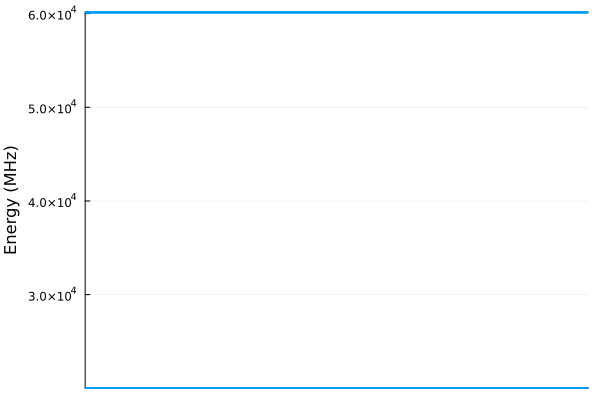

In [126]:
using Plots
hline(energy.(N1to2_states), legend=nothing)
plot!(
    xticks=nothing,
    ylabel="Energy (MHz)",
)

Gate is performed by driving $\pi_{1 \rightarrow e}$

### Stark plots

In [127]:
function H_func!(H, scan_values)
    H.parameters.E = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [128]:
Es = H.parameters.E .- (-1:0.01:1) .* 1e-3
scan_params = (
    E = Es,
    );
iterator = Iterators.product
@time scan_values, tracked_idxs = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00Progress:   1%|█                                        |  ETA: 0:00:12


  0.313583 seconds (324.81 k allocations: 102.819 MiB, 338.41% compilation time)


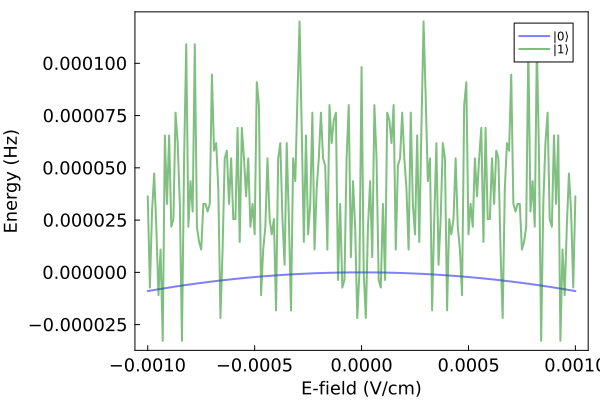

In [129]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[round(Int, end/2),:]'
plot(Es, 1e6 .* Es_rel[:,idx_0], linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩")
plot!(Es, 1e6 .* Es_rel[:,idx_1], linewidth=2, linecolor=:green, alpha=0.5, label="|1⟩")
# plot!(Es, 1e6 .* Es_rel[:,idx_e], linewidth=2, linecolor=:red, alpha=0.5, label="|e⟩")
plot!(
    xlabel="E-field (V/cm)",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
)

### Zeeman plots

In [136]:
function H_func!(H, scan_values)
    H.parameters.B_z = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [137]:
Bs = H.parameters.B_z .+ (0:0.01:1) .* 1e-3
scan_params = (
    B = Bs,
    );
iterator = Iterators.product
@time scan_values, tracked_idxs = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.290188 seconds (289.83 k allocations: 69.609 MiB, 7.14% gc time, 321.92% compilation time)


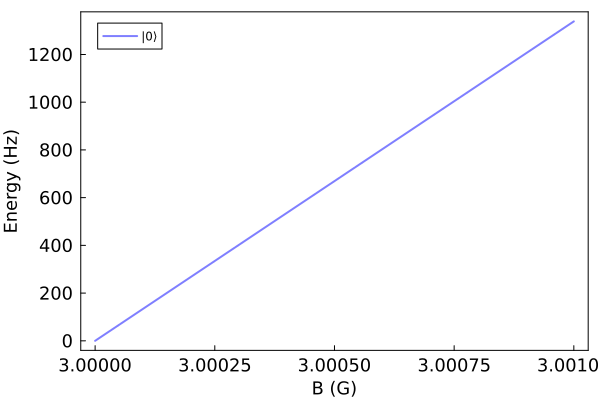

In [138]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot(Bs, 1e6 .* Es_rel[:,idx_0], linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩")
# plot!(Bs, 1e6 .*  Es_rel[:,idx_1], linewidth=2, linecolor=:green, alpha=0.5, label="|1⟩")
# plot!(Bs, 1e6 .* Es_rel[:,idx_e], linewidth=2, linecolor=:red, alpha=0.5, label="|e⟩")
plot!(
    xlabel="B (G)",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
    )

### Trap shift plots

In [139]:
function H_func!(H, scan_values)
    H.parameters.I_scalar = scan_values[1]
    H.parameters.I_tensor = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [140]:
Is = (0:0.01:1) .* (I_trap / (2ε_0 * c))
scan_params = (
    I = Is,
    );
iterator = Iterators.product
@time scan_values, _ = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.266369 seconds (292.38 k allocations: 69.619 MiB, 278.28% compilation time)


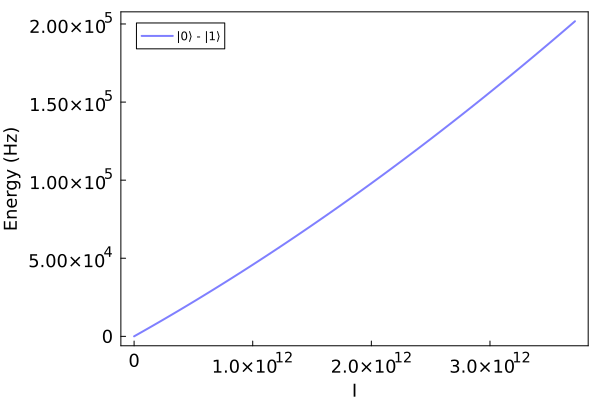

In [141]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot(Is, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_1]), linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩ - |1⟩")
# plot!(Is, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:green, alpha=0.5, label="|0⟩ - |e⟩")
# plot!(Is, 1e6 .* (Es_rel[:,idx_1] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:red, alpha=0.5, label="|1⟩ - |e⟩")
plot!(
    xlabel="I",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
    )